In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#import gspread
#from gspread_dataframe import get_as_dataframe, set_with_dataframe
#from google.colab import auth
#auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default()) 
#from google.colab import files
#uploaded = files.upload()

In [2]:
#import io
#train_dataset = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
train_dataset = pd.read_csv("F:\\Stevens_Masters\\Fall 18\\KDD\\Project\\Image_Reco\\train.csv")


In [ ]:

#train_dataset=pd.DataFrame(sheet.get_all_records())

In [3]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_dataset=pd.read_csv("test.csv")

In [ ]:
#test_dataset.head()

In [4]:
X=train_dataset.iloc[:,1:]
Y=train_dataset["label"]

In [ ]:
#knn.fit(X, Y)

In [ ]:
#test_predict = knn.predict(test_dataset)

In [ ]:
#test_predict

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

In [6]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
kvalue=[1,2,3,4,5,6,7,8,9,10]



In [7]:
X_train=X_train/255
X_test=X_test/255

In [11]:
accuracy_Percent=[]
for num in kvalue:
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    temp=accuracy_score(y_test, y_pred)
    accuracy_Percent.append(temp)
    print("Accuracy score when k="+str(num))
    print(temp)

Accuracy score when k=1
0.9660952380952381
Accuracy score when k=2
0.9581904761904761
Accuracy score when k=3
0.9682857142857143
Accuracy score when k=4
0.9677142857142857
Accuracy score when k=5
0.969047619047619
Accuracy score when k=6
0.9683809523809523
Accuracy score when k=7
0.9668571428571429
Accuracy score when k=8
0.9652380952380952
Accuracy score when k=9
0.9646666666666667
Accuracy score when k=10
0.9639047619047619


In [12]:
import matplotlib.pyplot as py
import matplotlib
import pylab

In [13]:
print(accuracy_Percent)

[0.9660952380952381, 0.9581904761904761, 0.9682857142857143, 0.9677142857142857, 0.969047619047619, 0.9683809523809523, 0.9668571428571429, 0.9652380952380952, 0.9646666666666667, 0.9639047619047619]


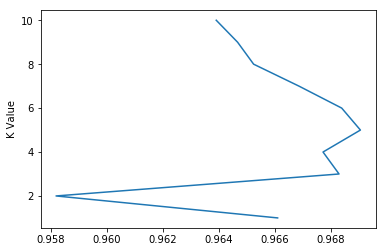

In [14]:
py.plot(accuracy_Percent,kvalue)
#py.axis([0.95,0.97])
py.ylabel("K Value")
#print(matplotlib.backends.backend)
py.show()

In [16]:
#MNIST Dataset validation with k=5

In [8]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

In [10]:
x_train.shape


(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
totalLength=x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(x_train.shape[0],totalLength)
x_test=x_test.reshape(x_test.shape[0],totalLength)

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(x_train)
temp=accuracy_score(Y_train, Y_pred)  
print("Accuracy score for mnist train data")
print(temp)
Y_pred = knn.predict(x_test)
temp=accuracy_score(Y_test, Y_pred)  
print("Accuracy score for mnist test data")
print(temp)

Accuracy score for mnist train data
0.9708
Accuracy score for mnist test data
0.9706
